In [1]:
from utils import *
from helpers import *
import pandas as pd
from params import *
import os

### adding SG with 1 maximum minutes of delay

In [19]:
tstamp = '1003-135528'
RESULTS_PATH = os.path.join(OUTPUT_FOLDER_PATH,'experiments_'+tstamp)
idle = pd.read_csv(os.path.join(RESULTS_PATH, 'idle.csv'))
pax = pd.read_csv(os.path.join(RESULTS_PATH, 'pax.csv'))
state = pd.read_csv(os.path.join(RESULTS_PATH, 'state.csv'))
trips = pd.read_csv(os.path.join(RESULTS_PATH, 'trips.csv'))

In [20]:
table, table_pcts = tabulate_improvements(state, idle, pax, trips, base_scenario='DN', flex_stops=FLEX_STOPS)

<AxesSubplot: xlabel='idle_time', ylabel='Count'>

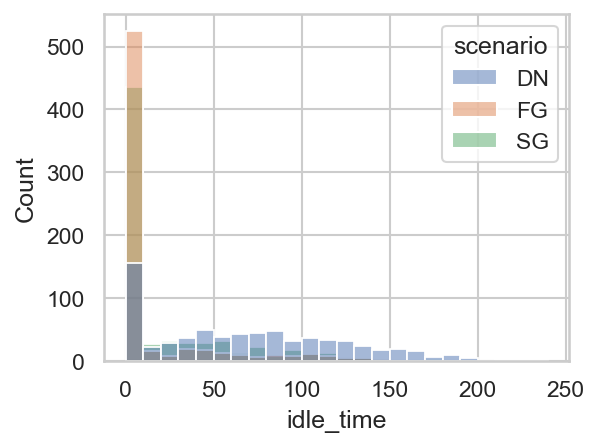

In [21]:
fig, axs = plt.subplots(figsize=(4,3))
sns.histplot(idle, x='idle_time', hue='scenario', common_norm=False)

In [22]:
table

,n_lates,idle_time,wait_time,headway_cv,load,denied_riders,fixed_ridership,flex_ridership,tot_ridership,n_trips
scenario,,,,,,,,,,
DN,117,13.00,304.0,0.122,2.64,1119,4981,NaN,4981,734
FG,489,2.65,427.0,0.745,3.35,129,4692,1029.0,5721,703
SG,407,4.51,329.0,0.662,3.05,420,4911,738.0,5649,728


In [23]:
table_pcts

,n_lates,idle_time,wait_time,headway_cv,load,denied_riders,fixed_ridership,flex_ridership,tot_ridership,n_trips
scenario,,,,,,,,,,
DN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000
FG,317.949,-79.615,40.461,510.656,26.894,-88.472,-5.802,NaN,14.856,-4.223
SG,247.863,-65.308,8.224,442.623,15.530,-62.466,-1.405,NaN,13.411,-0.817


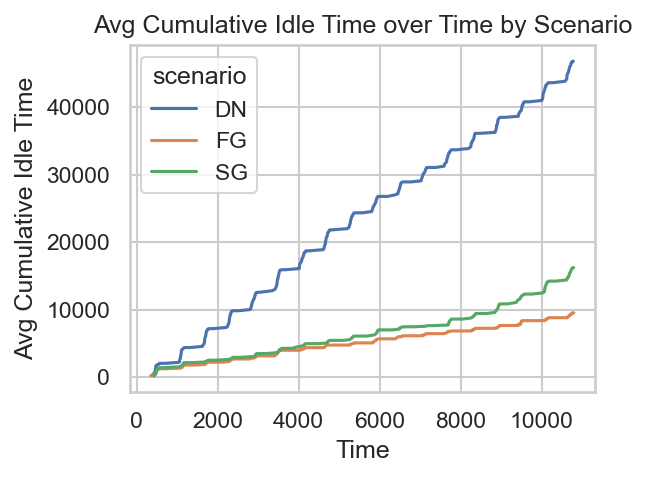

In [24]:
plot_cumulative_idle_time(idle)

## debugging

In [1]:
pax

NameError: name 'pax' is not defined

In [15]:
for direction in ('in', 'out'):
    for s in route.stops[direction]:
        if s.active_pax:
            print([(direction, p.origin, p.destination, p.arrival_time) for p in s.active_pax])

[('in', 0, 1, 6164.0)]
[('in', 2, 3, 157.0), ('in', 2, 3, 426.0), ('in', 2, 5, 1115.0), ('in', 2, 6, 1444.0), ('in', 2, 3, 1701.0), ('in', 2, 6, 2410.0), ('in', 2, 6, 2869.0), ('in', 2, 3, 3366.0)]
[('in', 3, 6, 5696.0)]
[('in', 4, 6, 280.0), ('in', 4, 5, 1974.0), ('in', 4, 6, 2670.0), ('in', 4, 6, 4121.0), ('in', 4, 6, 4718.0), ('in', 4, 5, 5348.0), ('in', 4, 6, 5610.0), ('in', 4, 6, 5662.0)]
[('in', 5, 6, 5756.0), ('in', 5, 6, 5878.0), ('in', 5, 6, 6040.0)]
[('out', 0, 1, 6008.0)]
[('out', 2, 3, 202.0), ('out', 2, 5, 893.0), ('out', 2, 6, 3028.0), ('out', 2, 6, 3718.0), ('out', 2, 3, 5718.0), ('out', 2, 6, 5863.0)]
[('out', 4, 6, 139.0), ('out', 4, 6, 1168.0), ('out', 4, 6, 2023.0), ('out', 4, 6, 2190.0), ('out', 4, 6, 2901.0), ('out', 4, 5, 3079.0), ('out', 4, 5, 3605.0), ('out', 4, 5, 4359.0), ('out', 4, 6, 4575.0), ('out', 4, 6, 5305.0), ('out', 4, 6, 5748.0)]
